*Save and Load results from here*

In [ ]:
def record_Results(key,results):
  import json
  from google.colab import drive


  drive.mount('/content/drive')

  dictionary ={
      key : results
  } 
  json_object = json.dumps(dictionary)

  FILE_PATH = "/content/drive/My Drive/Results/"+"Fashion_Mnsit_Experiment_3.0."+str(key)+".json"
  f = open(FILE_PATH, "w")
  f.write(json_object)
  print("recorded")

def Get_Results(file):
  import json
  from google.colab import drive

  drive.mount('/content/drive')

  FILE_PATH = "/content/drive/My Drive/Results/"+"Fashion_Mnsit_Experiment_3.0."+str(file)+".json"
  f = open(FILE_PATH, "r")
  json_object = json.load(f)
  
  return json_object

# **BS increasing with each epoch and hence the LR**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**STARTING GPU**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.9103832600000032
GPU (s):
0.039617339999992396
GPU speedup over CPU: 73x


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
def fashion_model():
  model = tf.keras.Sequential()
  # Must define the input shape in the first layer of the neural network
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  return model
# fashion_model()

In [ ]:
fashion_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [ ]:
def Plotter(acc,val_acc,loss,val_loss,l_r):
  
  plt.plot(acc, label='accuracy')
  plt.plot(val_acc, label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()


  plt.plot(loss, label='loss')
  plt.plot(val_loss, label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend(loc='lower right')
  plt.show()

  plt.plot(l_r, label='Learning Rate')
  # plt.plot(val_loss, label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('LR')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
model = fashion_model()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
train_images.shape

(60000, 28, 28, 1)

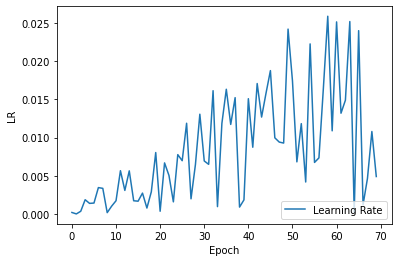

In [ ]:
from random import random,randint,randrange,uniform
lr = []
epoo=70
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  # print(z,(batch_size)/((z+1)**(3/2))/80)
  


  # if (z%2 == 0):
  LR = random() * batch_size/10000
  lr.append(LR)
#   else:
#     LR = random() * z/10000
#     lr.append(LR)

# lr = lr[::-1] 
lord_LR = lr
# print(min(lr))


plt.plot(lr, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('LR')
plt.legend(loc='lower right')
plt.show()


# lr = []
# epoo=150
# for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

#   # print(z,(batch_size)/((z+1)**(3/2))/80)
  

#   LR = random() * z/10000
#   # LR=LR/8
#   lr.append(LR)

# plt.plot(lr, label='Learning Rate')
# plt.xlabel('Epoch')
# plt.ylabel('LR')
# plt.legend(loc='lower right')
# plt.show()

**Test for LR**

In [ ]:
# lr = []
# epoo=150
# for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

#   # print(z,(batch_size)/((z+1)**(3/2))/80)


#   LR = (batch_size)/((z+1)**(3/2)*80)
#   LR=LR/8
#   lr.append(LR)

# plt.plot(lr, label='Learning Rate')
# # plt.plot(val_loss, label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('LR')
# plt.legend(loc='lower right')
# plt.show()

**Normal default fit** : LR and Batch Size default

In [ ]:
# train_images = train_images.reshape(28,28,-1)
# test_images = test_images.reshape(28,28,-1)
history = model.fit(train_images, train_labels, epochs=epoo,
                    validation_data=(test_images, test_labels))





Epoch 1/70
1875/1875 [==============================] - 8s 3ms/step - loss: 0.7629 - accuracy: 0.7167 - val_loss: 0.3906 - val_accuracy: 0.8562
Epoch 2/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4049 - accuracy: 0.8535 - val_loss: 0.3282 - val_accuracy: 0.8810
Epoch 3/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3526 - accuracy: 0.8714 - val_loss: 0.3005 - val_accuracy: 0.8909
Epoch 4/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3269 - accuracy: 0.8804 - val_loss: 0.2785 - val_accuracy: 0.8969
Epoch 5/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3064 - accuracy: 0.8878 - val_loss: 0.2862 - val_accuracy: 0.8939
Epoch 6/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2924 - accuracy: 0.8907 - val_loss: 0.2599 - val_accuracy: 0.9050
Epoch 7/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2713 - accuracy: 0.8999 - val_loss: 0.2425 - val_accuracy:

In [ ]:
acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']

In [ ]:
#Save these values in your jsonm
record_Results("acc_1",acc_1)
record_Results("val_acc_1",val_acc_1)

Mounted at /content/drive
recorded
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded


In [ ]:
#Get the saved results
acc_1 = Get_Results("acc_1")["acc_1"]
val_acc_1 = Get_Results("val_acc_1")["val_acc_1"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


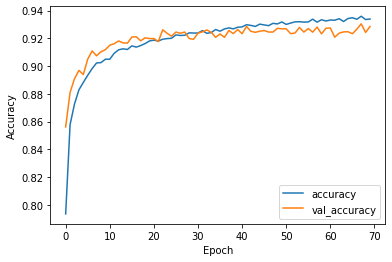

313/313 - 1s - loss: 0.2217 - accuracy: 0.9285


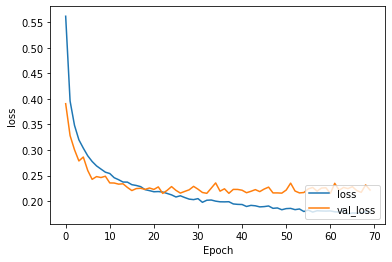

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

**LR ∝ BS/Epoch**

In [ ]:
model = fashion_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []

num = 0

x = 0
# kr = lr
for z,batch_size in zip(range(1,epoo),range(5,10000,5)):

  # if (z%2 == 0):
  LR = random() * batch_size/10000
  # lr.append(LR)
  # else:
  #   LR = random() * z/10000
  # lr.append(LR)

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    global x
    global lord_LR 

    LR=lord_LR[x]
    x+=1
    if(LR>0.009):
      LR = 0.009
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  history = model.fit(
            train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=epoch,
            batch_size=batch_size,
            callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])

  # if(num >= 50 ):
  #   x = input("type anything if you want to continue >  ")
  #   num = 0
  # num += 1




epoch 1, Learning Rate 1.0928879395005197e-06, Batch Size  5 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.00019337557347862128.
12000/12000 [==============================] - 32s 3ms/step - loss: 0.8137 - accuracy: 0.7003 - val_loss: 0.4015 - val_accuracy: 0.8533


epoch 2, Learning Rate 0.0009338353094435444, Batch Size  10 

Epoch 00001: LearningRateScheduler reducing learning rate to 5.138299970070981e-06.
6000/6000 [==============================] - 19s 3ms/step - loss: 0.4321 - accuracy: 0.8447 - val_loss: 0.3814 - val_accuracy: 0.8609


epoch 3, Learning Rate 0.00017567720203008974, Batch Size  15 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003518715327366761.
4000/4000 [==============================] - 15s 4ms/step - loss: 0.4111 - accuracy: 0.8502 - val_loss: 0.3411 - val_accuracy: 0.8761


epoch 4, Learning Rate 0.0014792460555973113, Batch Size  20 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0018620434161284202

In [ ]:
acc_2 = acc
val_acc_2 = val_acc

In [ ]:
#Save these values in your jsonm
record_Results("acc_2",acc_2)
record_Results("val_acc_2",val_acc_2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded


In [ ]:
#Get the saved results
acc_2 = Get_Results("acc_2")["acc_2"]
val_acc_2 = Get_Results("val_acc_2")["val_acc_2"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


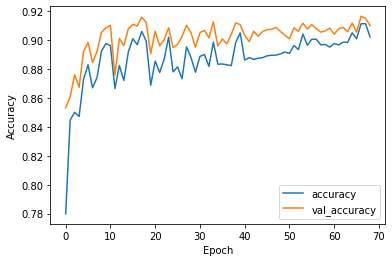

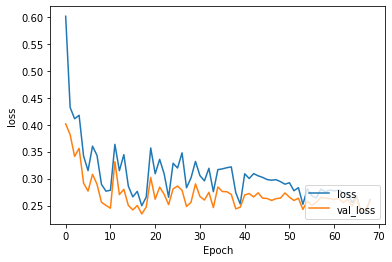

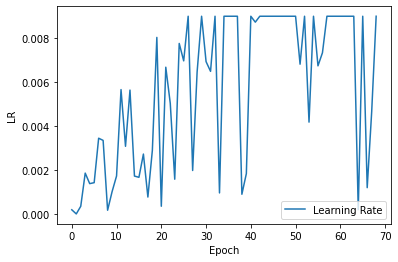

In [ ]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**Keeping batch size constant**

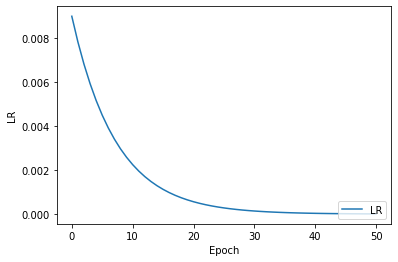

In [ ]:
initial_learning_rate = 0.009
decay_steps=5
decay_rate=0.5
LR = []
for i in range(51):
  lr = initial_learning_rate * decay_rate **(i / decay_steps)
  LR.append(lr)
plt.plot(LR, label='LR')
# plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('LR')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.callbacks import LearningRateScheduler
model = fashion_model()
# epoo = 1
initial_learning_rate = 0.009
decay_steps=5
decay_rate=0.5
LR = []
def setLR(step):
  global LR
  lr = initial_learning_rate * decay_rate **(step / decay_steps)
  LR.append(lr)
  # print("called here")
  return lr

call = [ LearningRateScheduler(setLR,verbose=1) ]

history = model.fit(
            train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=epoo,
            callbacks=call
            )

Epoch 1/70

Epoch 00001: LearningRateScheduler reducing learning rate to 0.009.
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7632 - accuracy: 0.7190 - val_loss: 0.4290 - val_accuracy: 0.8421
Epoch 2/70

Epoch 00002: LearningRateScheduler reducing learning rate to 0.007834955069665117.
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5387 - accuracy: 0.8021 - val_loss: 0.4440 - val_accuracy: 0.8348
Epoch 3/70

Epoch 00003: LearningRateScheduler reducing learning rate to 0.006820724549296791.
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5042 - accuracy: 0.8148 - val_loss: 0.3683 - val_accuracy: 0.8614
Epoch 4/70

Epoch 00004: LearningRateScheduler reducing learning rate to 0.005937785598478023.
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4681 - accuracy: 0.8288 - val_loss: 0.3633 - val_accuracy: 0.8654
Epoch 5/70

Epoch 00005: LearningRateScheduler reducing learning rate to 0.005169142597486656.
1875/187

In [ ]:

acc = []
val_acc = []
loss = []
val_loss = []

acc.append(history.history['accuracy'])
val_acc.append(history.history['val_accuracy'])
loss.append(history.history['loss'])
val_loss.append(history.history['val_loss'])

In [ ]:
#@title

# model = fashion_model()

# from keras.callbacks import LearningRateScheduler

# LR = 0.01
# epoch = 1
# batch_size = 100

# val_acc = []
# acc = []
# val_loss = []
# loss = []
# l_r = []
# for z,batch_size in zip(range(1,50),range(5,10000,5)):

#   LR = (batch_size)/(((z+1)**(3/2))*80)
#   LR=LR/8

#   print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
#                     .format(z=z,LR=LR,batch_size=batch_size))

#   def set_LR(epoch,lr):
#     global LR
#     global l_r
#     l_r.append(LR)
#     return LR

#   call = [ LearningRateScheduler(set_LR,verbose=1) ]

#   history = model.fit(
#             train_images, train_labels, 
#             validation_data=(test_images, test_labels),
#             epochs=epoch,
#             # batch_size=batch_size,
#             callbacks=call
#             )



#   acc.append(history.history['accuracy'])
#   val_acc.append(history.history['val_accuracy'])
#   loss.append(history.history['loss'])
#   val_loss.append(history.history['val_loss'])

In [ ]:
acc_3 = acc[0]
val_acc_3 = val_acc[0]

# acc_3

In [ ]:
#Save these values in your jsonm
record_Results("acc_3",acc_3)
record_Results("val_acc_3",val_acc_3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded


In [ ]:
#Get the saved results
acc_3 = Get_Results("acc_3")["acc_3"]
val_acc_3 = Get_Results("val_acc_3")["val_acc_3"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


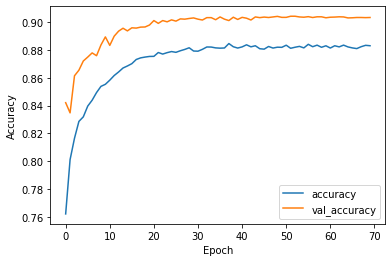

313/313 - 0s - loss: 0.2705 - accuracy: 0.9032


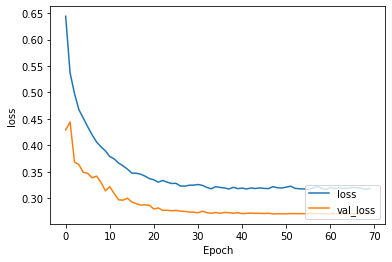

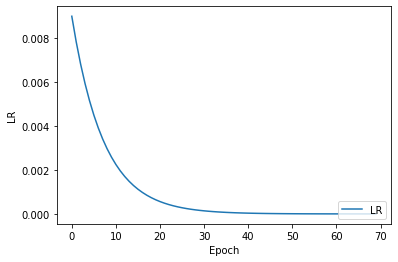

In [ ]:
plt.plot(acc_3, label='accuracy')
plt.plot(val_acc_3, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()


plt.plot(LR, label='LR')
# plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('LR')
plt.legend(loc='lower right')
plt.show()

**LR constant**

In [ ]:
model = fashion_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  LR = (batch_size)/(((z+1)**(3/2))*80)
  LR=LR/8

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  history = model.fit(
            train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=epoch,
            batch_size=batch_size,
            # callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])



epoch 1, Learning Rate 0.002762135864009951, Batch Size  5 
12000/12000 [==============================] - 32s 3ms/step - loss: 0.6513 - accuracy: 0.7583 - val_loss: 0.3420 - val_accuracy: 0.8722


epoch 2, Learning Rate 0.003007032652029301, Batch Size  10 
6000/6000 [==============================] - 20s 3ms/step - loss: 0.3583 - accuracy: 0.8693 - val_loss: 0.3114 - val_accuracy: 0.8833


epoch 3, Learning Rate 0.0029296875, Batch Size  15 
4000/4000 [==============================] - 16s 4ms/step - loss: 0.3246 - accuracy: 0.8811 - val_loss: 0.2838 - val_accuracy: 0.8957


epoch 4, Learning Rate 0.002795084971874737, Batch Size  20 
3000/3000 [==============================] - 13s 4ms/step - loss: 0.3034 - accuracy: 0.8894 - val_loss: 0.2670 - val_accuracy: 0.9007


epoch 5, Learning Rate 0.0026578664743741078, Batch Size  25 
2400/2400 [==============================] - 11s 5ms/step - loss: 0.2855 - accuracy: 0.8932 - val_loss: 0.2711 - val_accuracy: 0.9002


epoch 6, Learning R

In [ ]:
#@title

# # model = fashion_model()

# from keras.callbacks import LearningRateScheduler

# # LR = 0.01
# # epoch = 1
# # batch_size = 100

# # val_acc = []
# # acc = []
# # val_loss = []
# # loss = []
# # l_r = []
# for z,batch_size in zip(range(epoo//2,epoo+1),range(250,10000,5)):

#   LR = (batch_size)/(((z+1)**(3/2))*80)
#   LR=LR/8

#   print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
#                     .format(z=z,LR=LR,batch_size=batch_size))

#   def set_LR(epoch,lr):
#     global LR
#     global l_r
#     l_r.append(LR)
#     return LR

#   call = [ LearningRateScheduler(set_LR,verbose=1) ]

#   history = model.fit(
#             train_images, train_labels, 
#             validation_data=(test_images, test_labels),
#             epochs=epoch,
#             batch_size=batch_size,
#             # callbacks=call
#             )



#   acc.append(history.history['accuracy'])
#   val_acc.append(history.history['val_accuracy'])
#   loss.append(history.history['loss'])
#   val_loss.append(history.history['val_loss'])

In [ ]:
acc_4 = acc
val_acc_4 = val_acc


In [ ]:
#Save these values in your jsonm
record_Results("acc_4",acc_4)
record_Results("val_acc_4",val_acc_4)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
recorded


In [ ]:
#Get the saved results
acc_4 = Get_Results("acc_4")["acc_4"]
val_acc_4 = Get_Results("val_acc_4")["val_acc_4"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


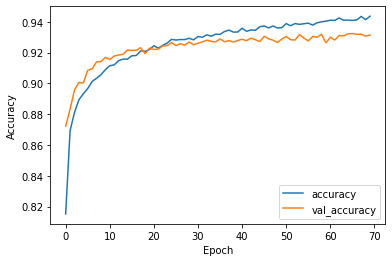

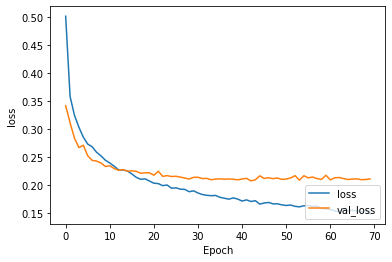

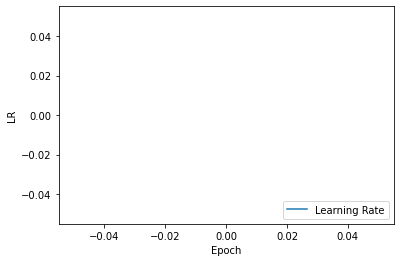

In [ ]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**Plotting all of them**

---



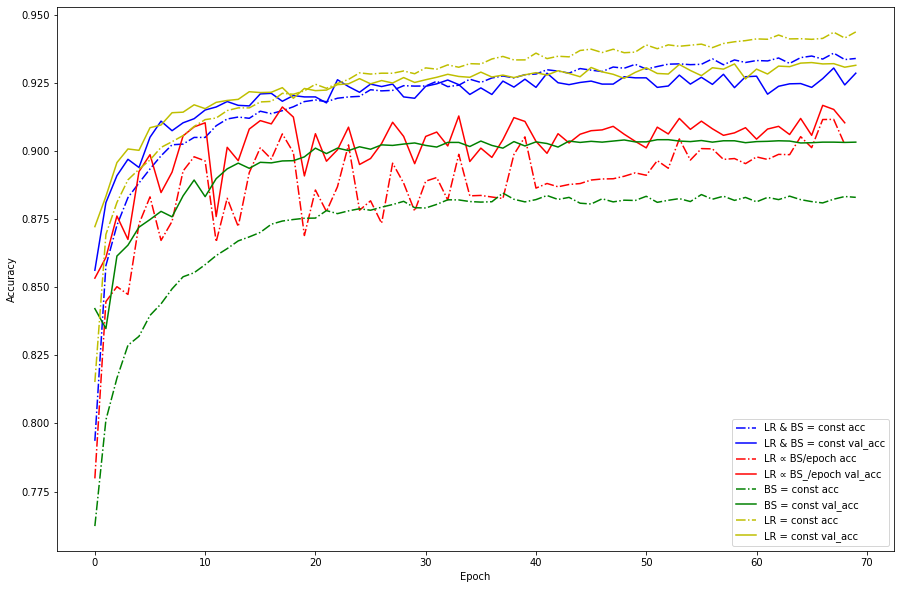

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(acc_1, label='LR & BS = const acc',ls='-.',c='b')
plt.plot(val_acc_1, label = 'LR & BS = const val_acc',c='b')
plt.plot(acc_2, label='LR ∝ BS/epoch acc',ls='-.',c='r')
plt.plot(val_acc_2, label = 'LR ∝ BS_/epoch val_acc',c='r')
plt.plot(acc_3, label='BS = const acc',ls='-.',c='g')
plt.plot(val_acc_3, label = 'BS = const val_acc',c='g')
plt.plot(acc_4, label='LR = const acc',ls='-.',c='y')
plt.plot(val_acc_4, label = 'LR = const val_acc',c='y')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# case4_fashion_acc,case4_fashion_val_acc0

In [ ]:
# acc_1_dif = []
# for i in range(len(acc_1)): acc_1_dif.append(acc_1[i] - val_acc_1[i]) 
# acc_2_dif = []
# for i in range(len(acc_2)): acc_2_dif.append(acc_2[i][0] - val_acc_2[i][0]) 
# acc_3_dif = []
# for i in range(len(acc_3)): acc_3_dif.append(acc_3[i][0] - val_acc_3[i][0]) 
# acc_4_dif = []
# for i in range(len(acc_4)): acc_4_dif.append(acc_4[i][0] - val_acc_4[i][0]) 

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(acc_1_dif, label='LR & BS = const acc',ls='-.',c='b')
# plt.plot(val_acc_1, label = 'LR & BS = const val_acc',c='b')
plt.plot(acc_2_dif, label='LR ∝ BS/epoch acc',ls='-.',c='r')
# plt.plot(val_acc_2, label = 'LR ∝ BS_/epoch val_acc',c='r')
plt.plot(acc_3_dif, label='BS = const acc',ls='-.',c='g')
# plt.plot(val_acc_3, label = 'BS = const val_acc',c='g')
# plt.plot(acc_4_dif, label='LR = const acc',ls='-.',c='y')
# plt.plot(val_acc_4, label = 'LR = const val_acc',c='y')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

NameError: ignored

<Figure size 1080x720 with 0 Axes>